In [1]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection

2022-11-18 14:48:54.583704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-18 14:48:54.583735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [11]:
dataset = '../dataset/music'
images, labels, class_names = load_data(dataset)

Loading Dataset ../dataset/music


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.88it/s]


In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-11-18 14:49:05.118221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-18 14:49:05.118265: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-18 14:49:05.118292: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RYZEN): /proc/driver/nvidia/version does not exist
2022-11-18 14:49:05.118574: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2)

2022-11-18 14:49:10.090834: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172530000 exceeds 10% of free system memory.


Epoch 1/5


2022-11-18 14:49:11.119630: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-11-18 14:49:11.934504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2022-11-18 14:49:11.934586: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


1/5 [=====>........................] - ETA: 7s - loss: 3.4187 - accuracy: 0.0078

2022-11-18 14:49:12.403991: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


5/5 [==============================] - 7s 1s/step - loss: 2.8590 - accuracy: 0.0923 - val_loss: 2.3983 - val_accuracy: 0.1063
Epoch 2/5
5/5 [==============================] - 6s 1s/step - loss: 2.3502 - accuracy: 0.1455 - val_loss: 2.2195 - val_accuracy: 0.2000
Epoch 3/5
5/5 [==============================] - 6s 1s/step - loss: 2.0665 - accuracy: 0.2598 - val_loss: 1.9570 - val_accuracy: 0.2625
Epoch 4/5
5/5 [==============================] - 6s 1s/step - loss: 1.8150 - accuracy: 0.3865 - val_loss: 1.8214 - val_accuracy: 0.3938
Epoch 5/5
5/5 [==============================] - 6s 1s/step - loss: 1.6304 - accuracy: 0.4648 - val_loss: 1.7163 - val_accuracy: 0.4187


In [10]:
def plot_accuracy_loss(history):
    y = ['accuracy','loss']
    for x in y:
        plt.plot(history.history[x],'bo--', label = x )
        plt.plot(history.history['val_'+x], 'ro--', label ='val_'+x)
        plt.title("train_"+x + " vs val_"+x)
        plt.ylabel(x)
        plt.xlabel("epochs")
        plt.legend()
        plt.legend()
        plt.show()

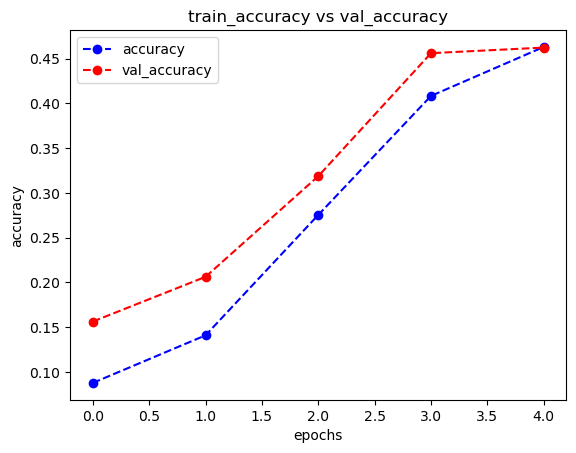

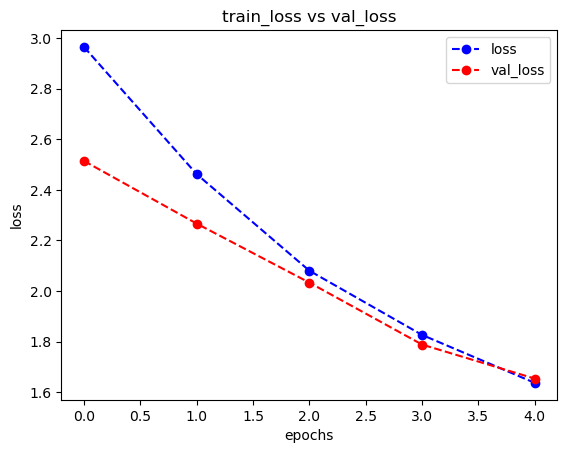

In [11]:
plot_accuracy_loss(history)

In [12]:
test_loss = model.evaluate(test_images, test_labels)

7/7 [==============================] - 0s 41ms/step - loss: 1.7501 - accuracy: 0.3950


In [13]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels

In [14]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

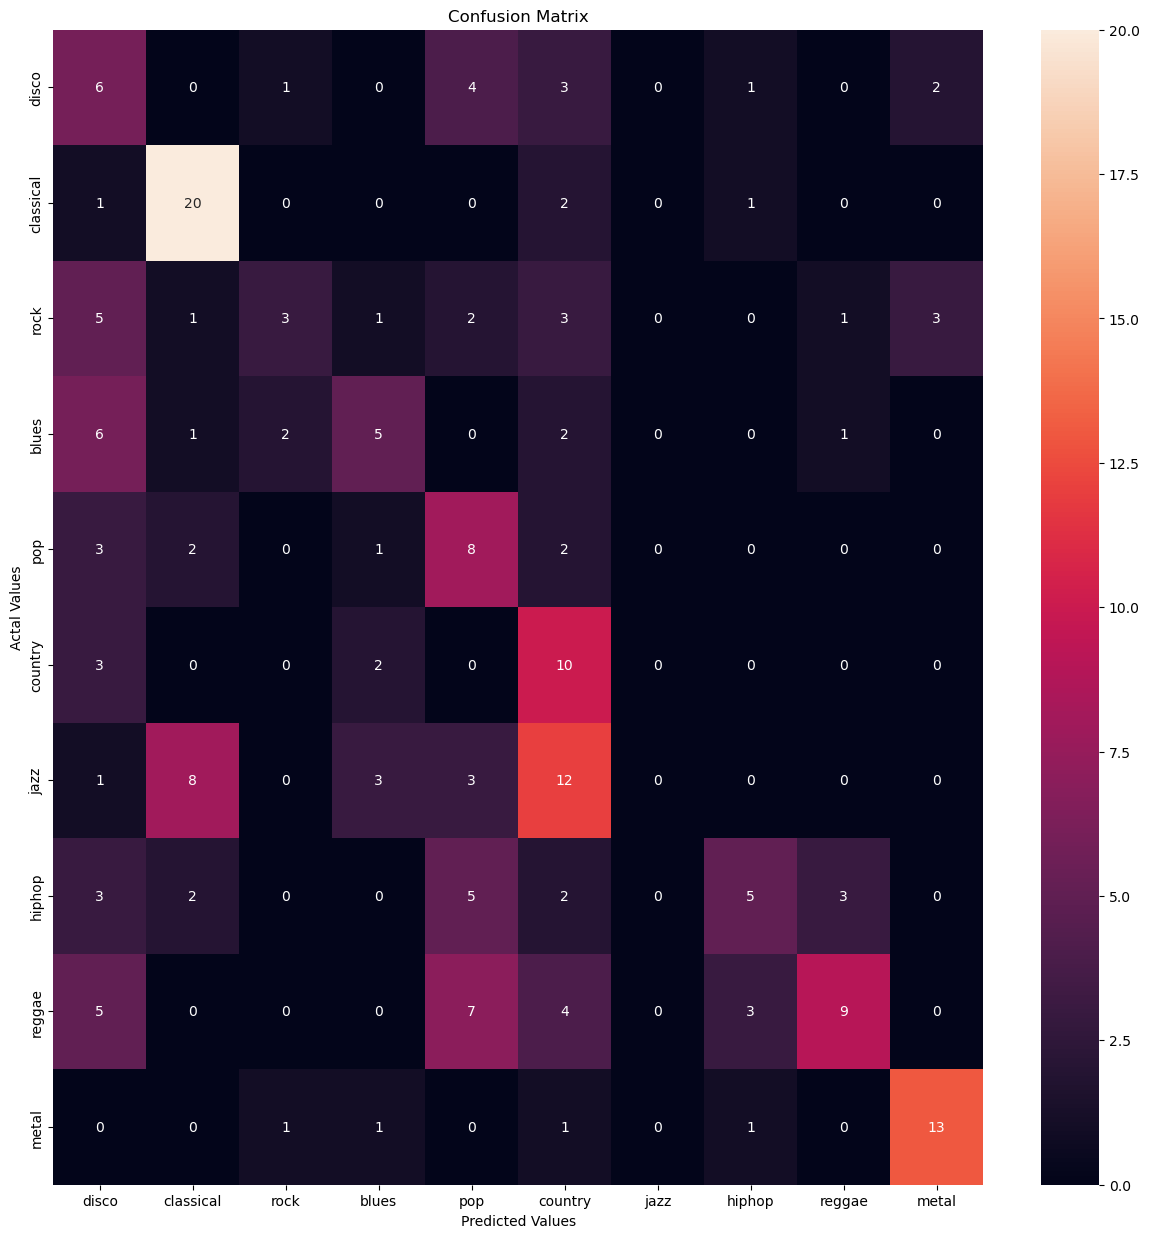

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
import netron
model_name = 'history.h5'
model.save(model_name)
netron.start(model_name, 8081)

Serving 'history.h5' at http://localhost:8081


('localhost', 8081)

In [25]:
netron.stop()

Stopping http://localhost:8081


In [27]:
import netron
#model_name = 'history.h5'
model.save('history.h5')
netron.start('history.h5', 8081)

AttributeError: 'History' object has no attribute 'h5'